# Vấn đề
Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân gây tử vong đứng thứ 2 trên toàn cầu, chiếm khoảng 11% tổng số ca tử vong.
Tập dữ liệu này được sử dụng để dự đoán liệu một bệnh nhân có khả năng bị đột quỵ hay không dựa trên các thông số đầu vào như giới tính, tuổi tác, các bệnh khác nhau và tình trạng hút thuốc. Mỗi hàng trong dữ liệu cung cấp thông tin liên quan về bệnh nhân.

Thông tin thuộc tính
1. id: mã định danh duy nhất
2. giới tính: “Nam”, “Nữ” hoặc “Khác”
3. age: tuổi của bệnh nhân
4. tăng huyết áp: 0 nếu bệnh nhân không bị tăng huyết áp, 1 nếu bệnh nhân bị tăng huyết áp
5. heart_disease: 0 nếu bệnh nhân không mắc bệnh tim, 1 nếu bệnh nhân mắc bệnh tim
6. ever_married: "Không" hoặc "Có"
7. work_type: "trẻ em", "Govt_jov", "Không bao giờ làm việc", "Tư nhân" hoặc "Tự kinh doanh"
8. Loại_nơi cư trú: "Nông thôn" hoặc "Thành thị"
9. avg_glucose_level: lượng đường trung bình trong máu
10. bmi: chỉ số khối cơ thể
11. smoking_status: "đã từng hút thuốc", "chưa bao giờ hút thuốc", "hút thuốc" hoặc "Không xác định"*
12. đột quỵ: 1 nếu bệnh nhân bị đột quỵ hoặc 0 nếu không
*Lưu ý: "Không xác định" trong smoking_status có nghĩa là bệnh nhân này không có thông tin

# Target
Classification for prediction if the patients get ability to stoke or not

In [2]:
from google.colab import drive
drive.mount("/content/dirve")

Mounted at /content/dirve


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = "/content/dirve/MyDrive/Healthcare_Stroke/healthcare-dataset-stroke-data.csv"
data = pd.read_csv(data_path)
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [5]:
data

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [6]:
#Tìm hiểu về các trường dữ liệu
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#tìm hiểu các giá trị của từng trường
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
#tìm hiểu về các giá trị của từng trường dữ liệu là số
data.describe()


id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [9]:
#xem số lượng dữ liệu trống
#tạo ra một DF "null_info" chứa 2 cột Null_count và Null_ratio
null_info = pd.DataFrame({"Null count":data.isnull().sum(),"Null ratio": data.isnull().sum()/len(data)})
null_info.drop('stroke',inplace = True)
null_info.sort_values(by='Null ratio', ascending=False, inplace=True)
null_info



Null count  Null ratio
bmi                       201    0.039335
id                          0    0.000000
gender                      0    0.000000
age                         0    0.000000
hypertension                0    0.000000
heart_disease               0    0.000000
ever_married                0    0.000000
work_type                   0    0.000000
Residence_type              0    0.000000
avg_glucose_level           0    0.000000
smoking_status              0    0.000000

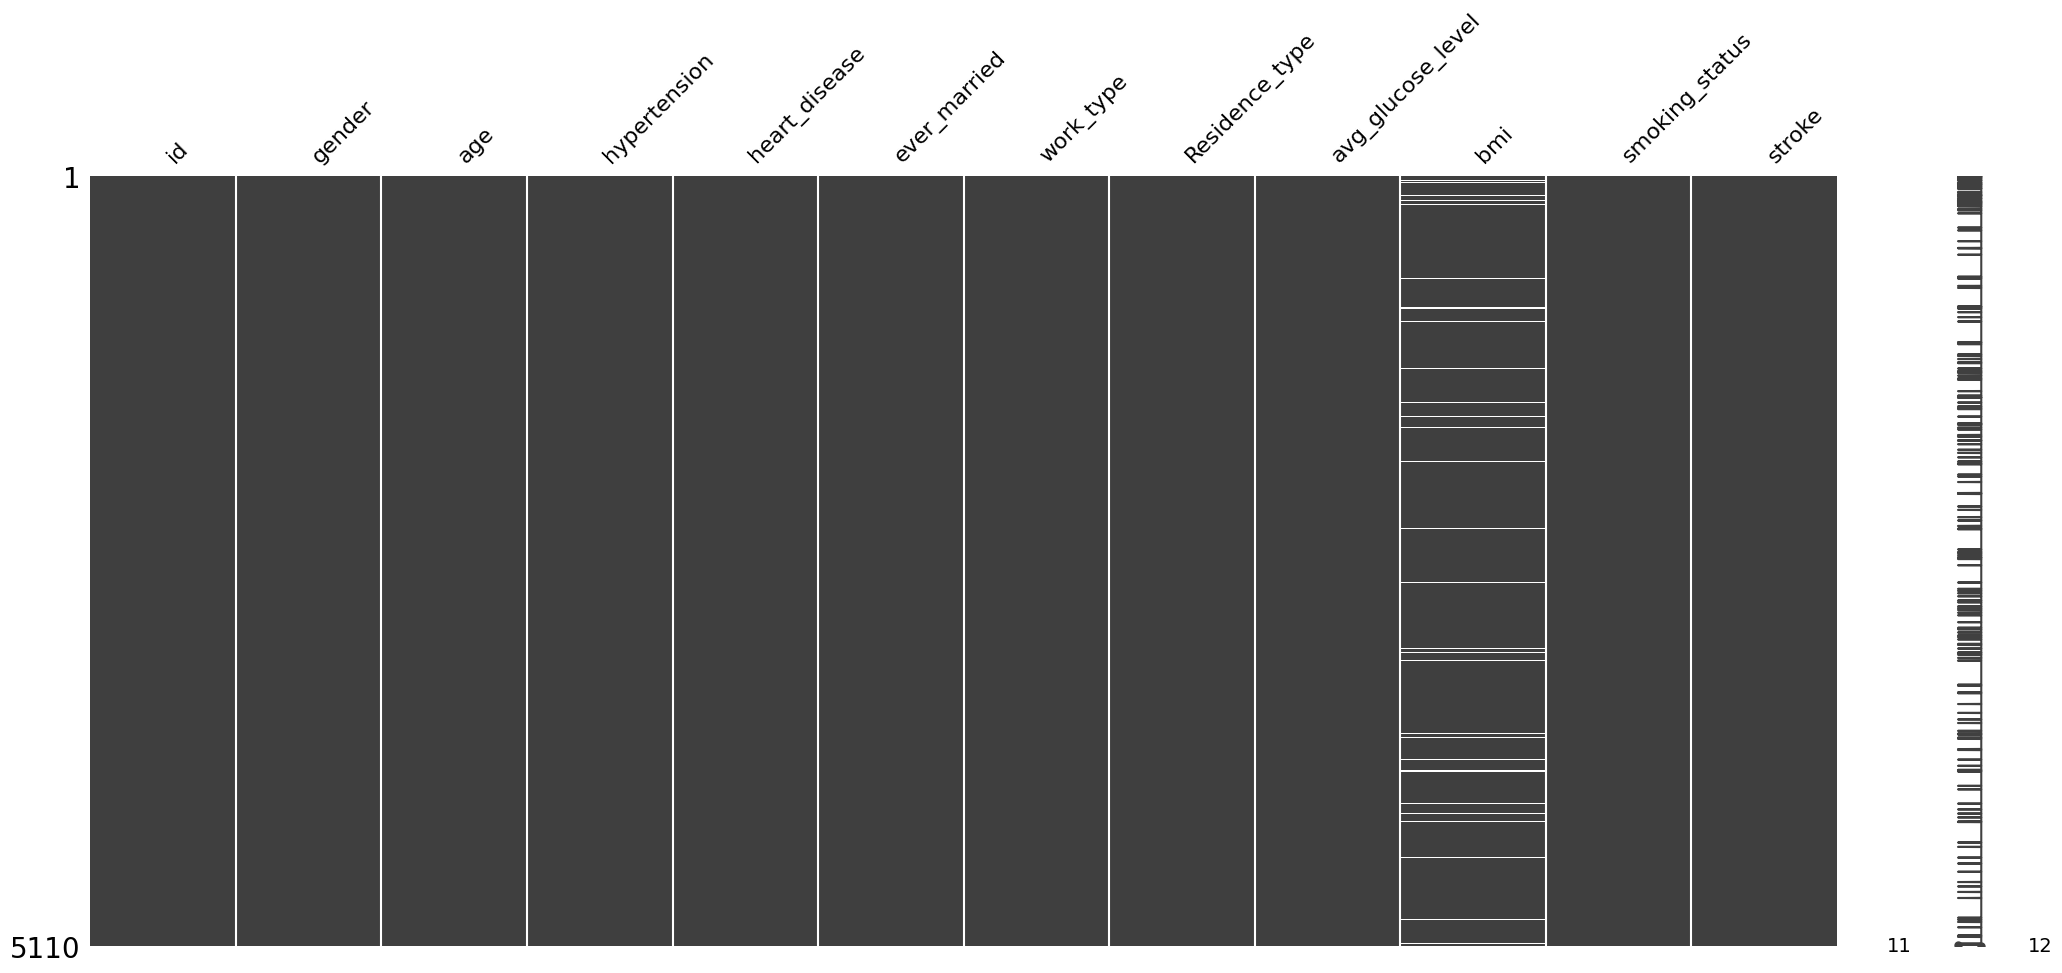

In [10]:
import missingno as msno
msno.matrix(data);

In [11]:
#xem tỉ số giữa các trường hợp positive và negative
print('% Negative:{}'.format((data.stroke ==0).sum()/len(data)*100,'.2f'))
print('% Positive :{}'.format((data.stroke == 0).sum()/len(data)*100,'.2f'))

% Negative:95.12720156555773
% Positive :95.12720156555773


# Visualization


In [12]:
data1 = data.copy()
data1.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

# Gender


In [13]:
data1['gender'].value_counts(dropna = False)

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Gender pie chart')

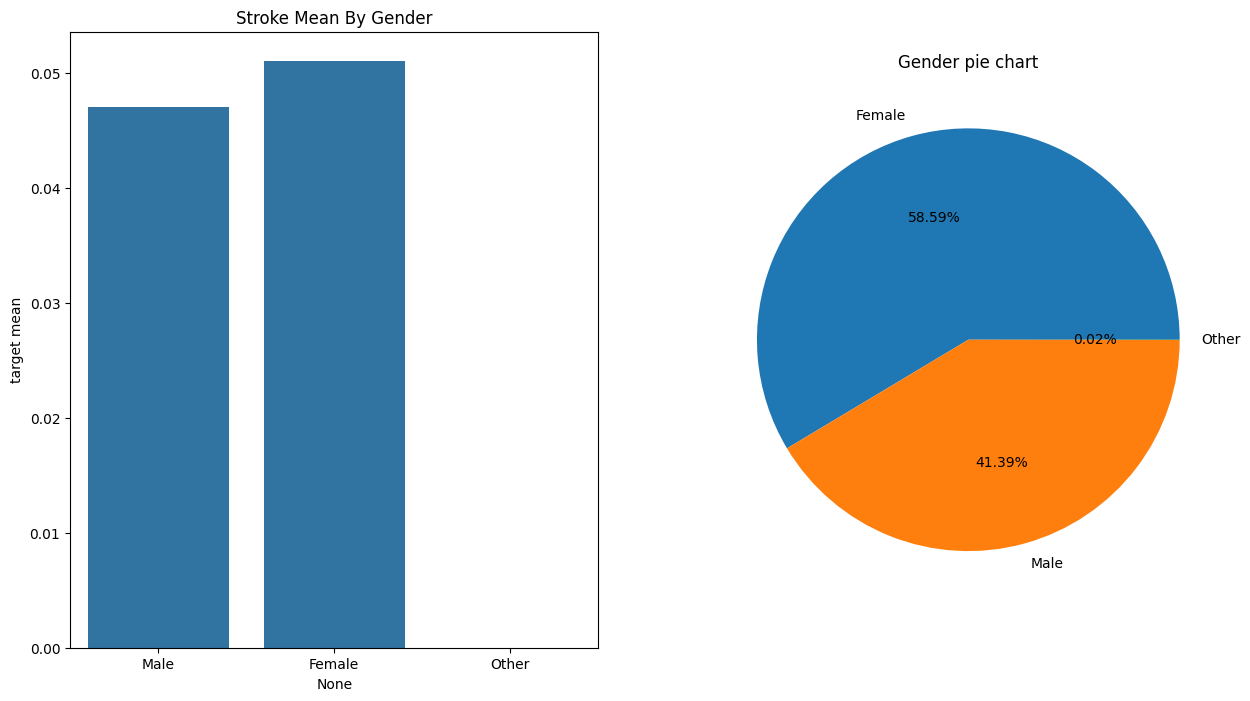

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
# tìm mối quan hệ giữa gender và stroke
mean_target_per_gender = data1.groupby('gender', dropna=False)['stroke'].mean()
print(type(mean_target_per_gender))
mean_target_per_gender.index = ['Male', 'Female', 'Other']
sns.barplot(x=mean_target_per_gender.index, y=mean_target_per_gender)
plt.ylabel('target mean')
plt.title('Stroke Mean By Gender')
fig = plt.subplot(1,2,2)
# pie chart
kinds = ['Female', 'Male', 'Other']
counts = [2994, 2115, 1]
fig.pie(counts, labels = kinds,autopct='%1.2f%%')
plt.title('Gender pie chart')

In [15]:
#encode data gender (mã hóa dữ liệu giới tính)
#Tạo một danh sách của các giá trị trong cột "gender" của DataFrame data1.
gender_list = data1['gender'].unique().tolist()
gender_list.sort()
for idx,value in enumerate(gender_list):
    data1['gender'] = data1['gender'].replace(value,idx)

data1['gender']

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5110, dtype: int64

#Age

In [16]:
data1['age'].value_counts(dropna=  False)

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

<ipython-input-17-4ebd7ac69c8c>:7: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x ='stroke',y = "age",data = data1,jitter = True,edgecolor ="gray")


Text(0.5, 1.0, 'Boxplot for age')

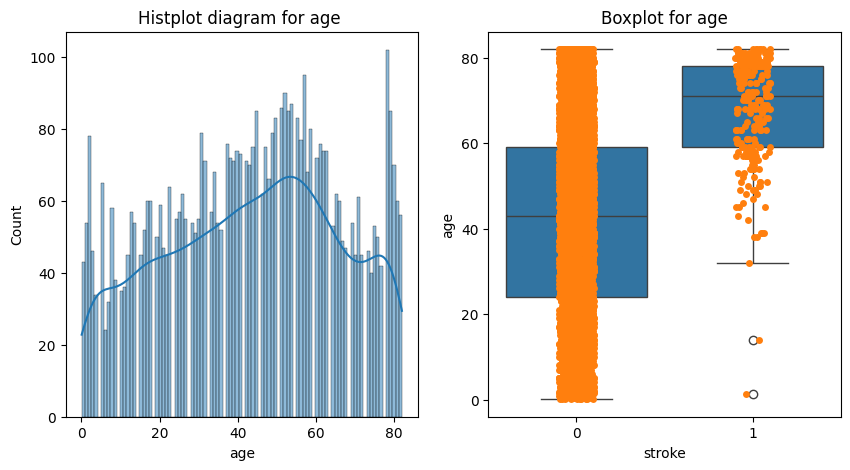

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data1.age,bins = 100,kde = True)
plt.title('Histplot diagram for age ')
plt.subplot(1,2,2)
sns.boxplot(x ='stroke',y = 'age',data = data1)
sns.stripplot(x ='stroke',y = "age",data = data1,jitter = True,edgecolor ="gray")
plt.title("Boxplot for age")

#hypertension

In [18]:
data1["hypertension"].value_counts(dropna = False)

hypertension
0    4612
1     498
Name: count, dtype: int64

Text(0.5, 1.0, 'Relationship between pos and neg of stroke by hypertension')

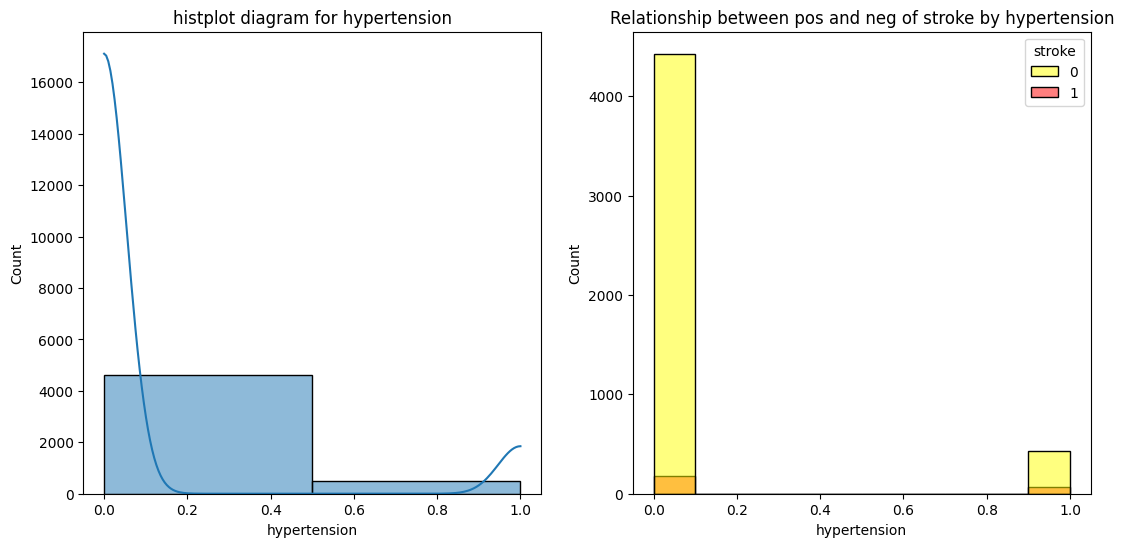

In [19]:
plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
sns.histplot(data1.hypertension,bins = 2,kde = True)
plt.title('histplot diagram for hypertension')
plt.subplot(1,2,2)
sns.histplot(x ='hypertension' ,data = data1,hue ='stroke',multiple ='layer',palette =['yellow','red'],bins = 10);
plt.title("Relationship between pos and neg of stroke by hypertension")

# heart_disease

In [20]:
data1['heart_disease'].value_counts(dropna = True)


heart_disease
0    4834
1     276
Name: count, dtype: int64

Text(0.5, 1.0, 'Pie chart for heart_disease')

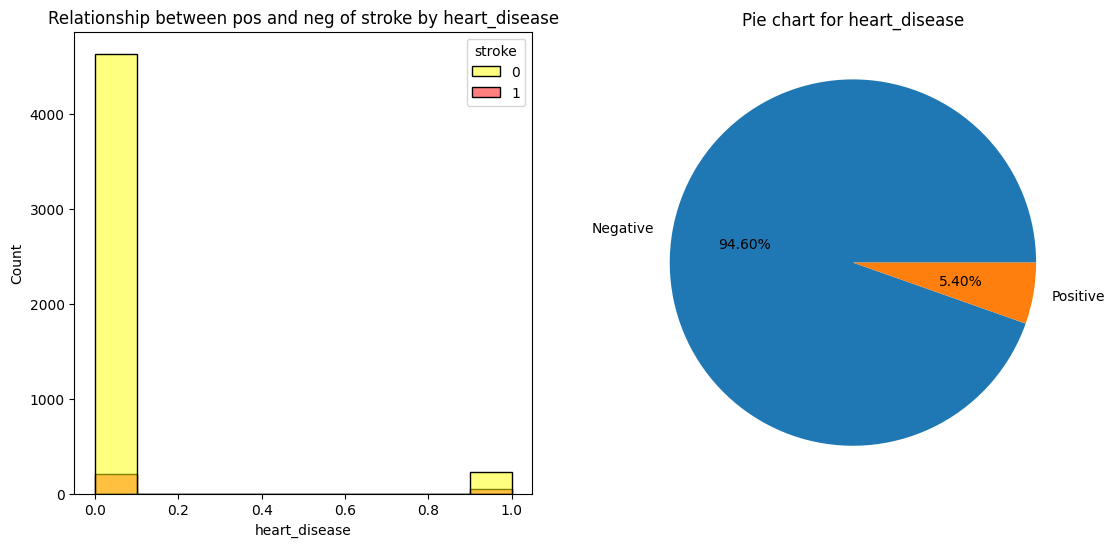

In [21]:
plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
sns.histplot(data = data1,x ='heart_disease',hue = 'stroke',multiple = 'layer',palette = ['yellow','red'],bins = 10);
plt.title('Relationship between pos and neg of stroke by heart_disease')
fig = plt.subplot(1,2,2)
#pia chart (vẽ biểu đồ tròn)
kinds= ['Negative',"Positive"]
counts =[4834,276]
fig.pie(counts,labels = kinds,autopct = '%1.2f%%')
plt.title('Pie chart for heart_disease')

#ever_married

In [22]:
data1['ever_married'].value_counts(dropna = False)


ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Text(0.5, 1.0, 'ever_married pie chart')

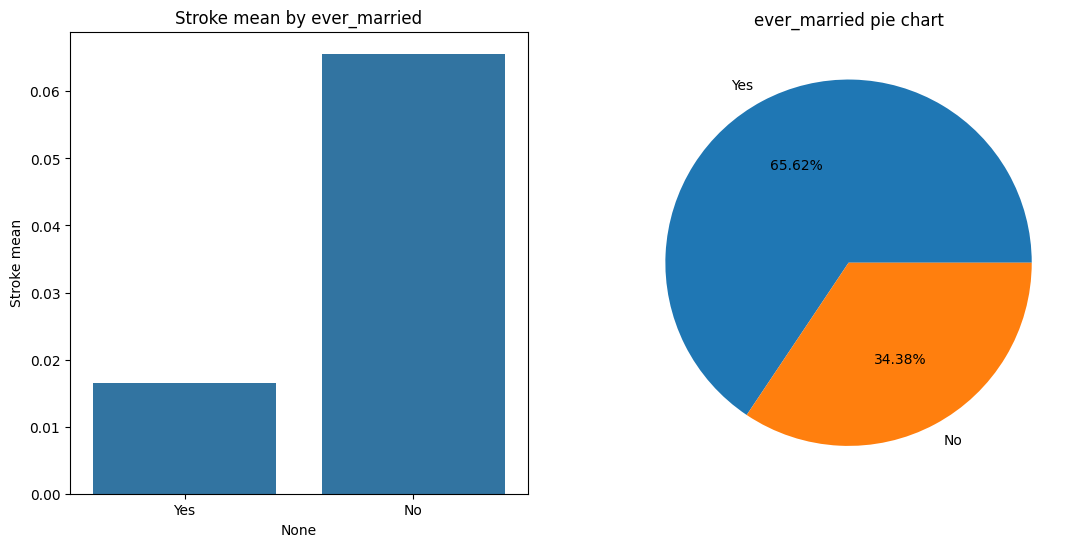

In [23]:
plt.figure(figsize = (13,6))
plt.subplot(1,2,1)
#tìm hiểu về mối quan hệ giữa even_married và stroke
mean_target_per_ever_married = data1.groupby('ever_married',dropna = False)['stroke'].mean()
mean_target_per_ever_married.index =['Yes','No']
sns.barplot(x= mean_target_per_ever_married.index ,y = mean_target_per_ever_married)
plt.ylabel("Stroke mean")
plt.title("Stroke mean by ever_married")
fig = plt.subplot(1,2,2)
#pie chart
kinds = ['Yes','No']
counts = [3353,1757]
fig.pie(counts,labels = kinds,autopct = '%1.2f%%')
plt.title('ever_married pie chart')

In [24]:
#encode data cho ever_married
ever_married_list =data1['ever_married'].unique().tolist()
ever_married_list.sort()
for idx , value in enumerate(ever_married_list):
    data1['ever_married'] = data1['ever_married'].replace(value,idx)
data1['ever_married']

0       1
1       1
2       1
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 5110, dtype: int64

#Work_Type

In [25]:
data1['work_type'].value_counts(dropna = False)

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

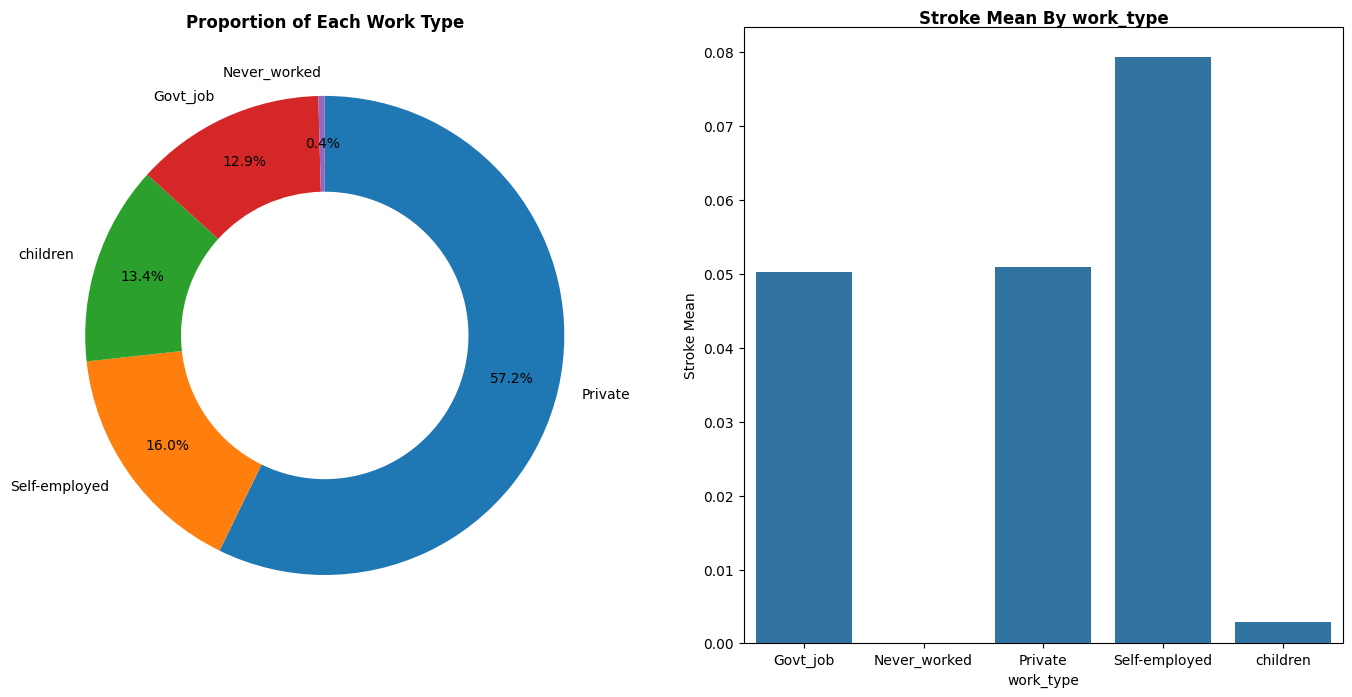

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(17,8))
work_type_count = data1.work_type.value_counts(dropna = False)
ax1.pie(work_type_count,labels =work_type_count.index,startangle = 90,counterclock = False,
        wedgeprops = {'width':0.4},autopct = '%1.1f%%',pctdistance = 0.8);
ax1.set_title('Proportion of Each Work Type', fontsize=12, fontweight='bold')
# relationship
mean_stroke_by_work = data1.groupby('work_type', dropna=False).agg({'stroke':np.mean})
sns.barplot(x=mean_stroke_by_work.index, y=mean_stroke_by_work.stroke, ax=ax2)
ax2.set_ylabel('Stroke Mean')
ax2.set_title('Stroke Mean By work_type', fontsize=12, fontweight='bold', pad=0.8);


In [27]:
work_type_list = data1['work_type'].unique().tolist()
work_type_list.sort()
for idx , value in enumerate(work_type_list):
    data1['work_type'] = data1['work_type'].replace(value,idx)
data1['work_type']

0       2
1       3
2       2
3       2
4       3
       ..
5105    2
5106    3
5107    3
5108    2
5109    0
Name: work_type, Length: 5110, dtype: int64

#Residence_Type

In [28]:
data1['Residence_type'].value_counts(dropna = False)

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Text(0.5, 1.0, 'Resident_type pie chart')

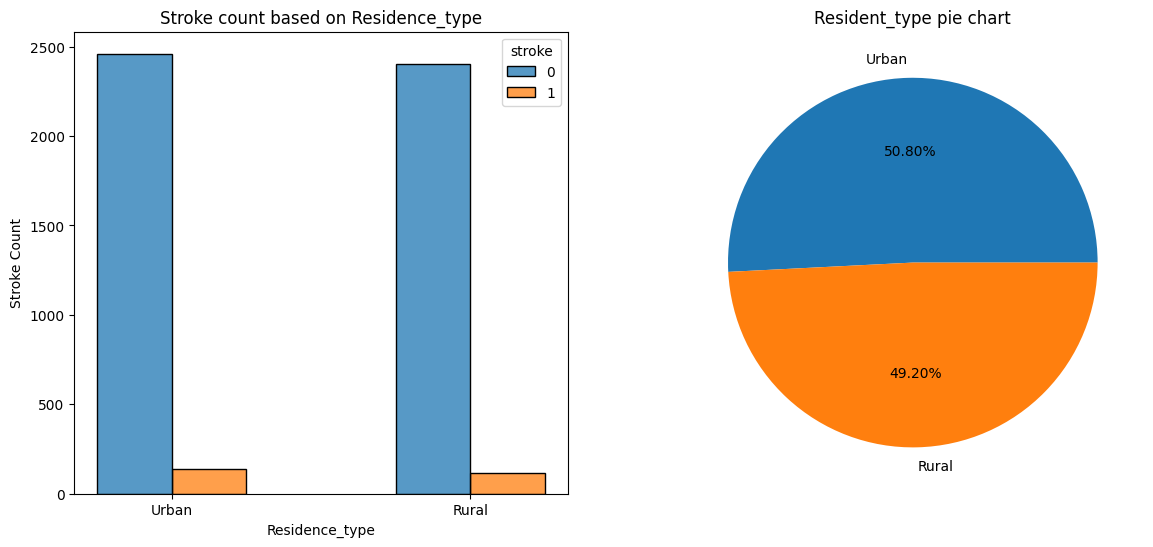

In [29]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.histplot(data = data1 ,x = "Residence_type",hue ="stroke",multiple = "dodge",shrink =0.5)
plt.ylabel("Stroke Count")
plt.title("Stroke count based on Residence_type")
fig = plt.subplot(1,2,2)
#pie chart
kinds = ['Urban','Rural']
counts =[2596,2514]
fig.pie(counts ,labels = kinds,autopct = '%1.2f%%')
plt.title('Resident_type pie chart')


In [30]:
#encode data for residence_type
Residence_type_list = data1['Residence_type'].unique().tolist()
Residence_type_list.sort()
for idx ,value in enumerate(Residence_type_list):
    data1['Residence_type'] = data1['Residence_type'].replace(value,idx)
data1['Residence_type']

0       1
1       0
2       0
3       1
4       0
       ..
5105    1
5106    1
5107    0
5108    0
5109    1
Name: Residence_type, Length: 5110, dtype: int64

#avg_glucose_level

In [31]:
data1['avg_glucose_level'].value_counts(dropna = False)


avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979, dtype: int64

Text(0.5, 1.0, 'Relationship of pos and neg of stroke for avg_glucese_level')

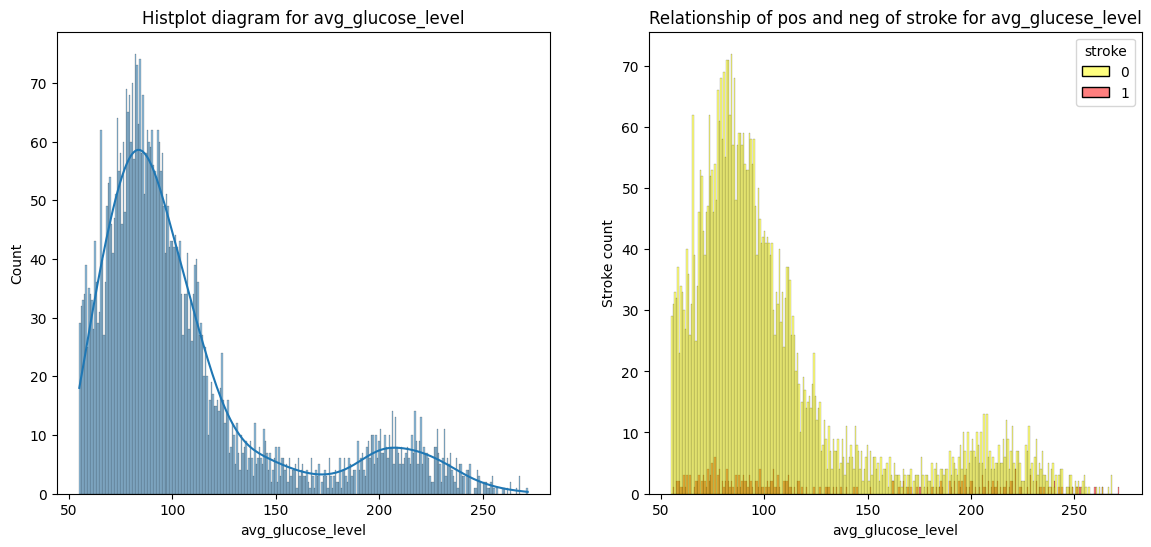

In [32]:
plt.figure(figsize =(14,6))
plt.subplot(1,2,1)
sns.histplot(data1.avg_glucose_level,bins = 300,kde = True )
plt.title("Histplot diagram for avg_glucose_level")
plt.subplot(1,2,2)
sns.histplot(data= data1,x ="avg_glucose_level",hue = "stroke",multiple ="layer",palette =['yellow','red'],bins =300);
plt.ylabel("Stroke count")
plt.title("Relationship of pos and neg of stroke for avg_glucese_level")

#Bmi

In [33]:
data1['bmi'].value_counts(dropna = False)

bmi
NaN     201
28.7     41
28.4     38
27.6     37
26.7     37
       ... 
11.5      1
40.6      1
53.9      1
97.6      1
14.9      1
Name: count, Length: 419, dtype: int64

<ipython-input-34-cfd3d3606e34>:7: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='stroke',y='bmi',data=data1,jitter=True,edgecolor='gray')


Text(0.5, 1.0, 'Violin for bmi')

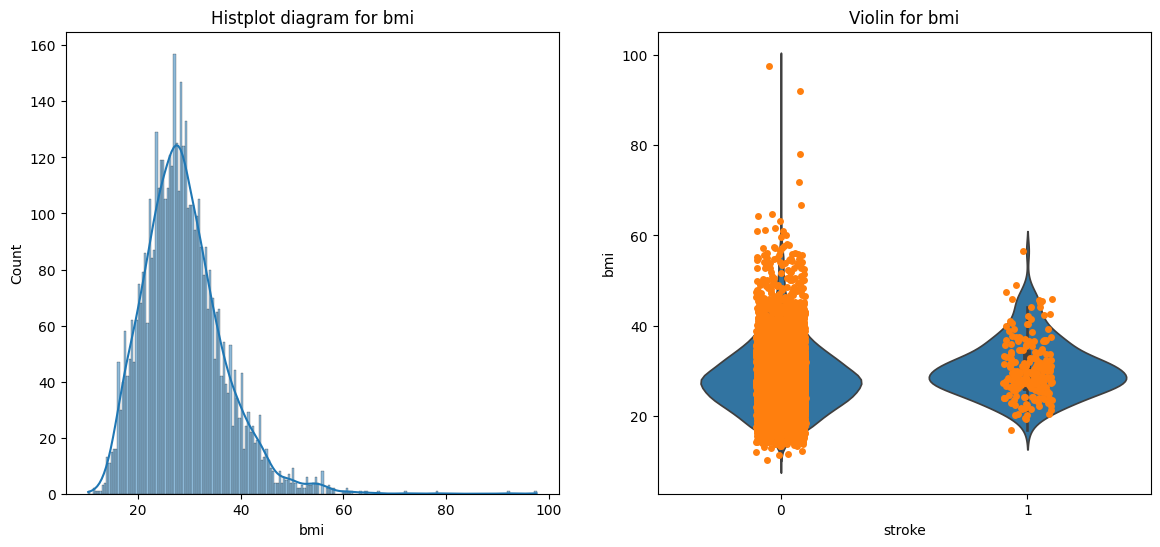

In [34]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.histplot(data1.bmi,kde = True,bins=200)
plt.title("Histplot diagram for bmi")
plt.subplot(1,2,2)
sns.violinplot(x="stroke", y="bmi", data=data1)
sns.stripplot(x='stroke',y='bmi',data=data1,jitter=True,edgecolor='gray')
plt.title('Violin for bmi')

# smoking status

In [35]:
data1['smoking_status'].value_counts(dropna = False )

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

Text(0, 0.5, 'Stroke Mean')

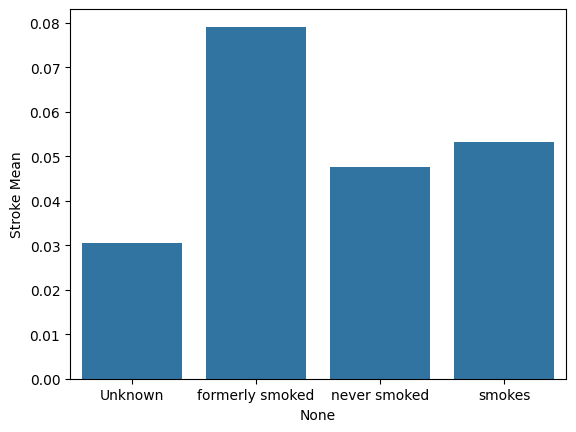

In [36]:
#Áp dụng hàm tính trung bình (np.mean) cho cột 'stroke' trong mỗi nhóm
mean_stroke_by_smoking_status = data1.groupby('smoking_status',dropna = False).agg({'stroke': np.mean})
# chỉnh sửa mục để vẽ phần rỗng
edited_index = list(mean_stroke_by_smoking_status.index)
## edited_index[5] = 'NaN'
mean_stroke_by_smoking_status.index = edited_index
#plot
sns.barplot(x=mean_stroke_by_smoking_status.index, y=mean_stroke_by_smoking_status.stroke)
plt.ylabel('Stroke Mean')


In [43]:
#encode data for smoking_status
smoking_status_list = data1['smoking_status'].unique().tolist()
smoking_status_list.sort()

for idx, value in enumerate(smoking_status_list):
    data1['smoking_status'] = data1['smoking_status'].replace(value, idx)

data1['smoking_status']

0       1
1       2
2       2
3       3
4       2
       ..
5105    2
5106    2
5107    2
5108    1
5109    0
Name: smoking_status, Length: 5110, dtype: int64

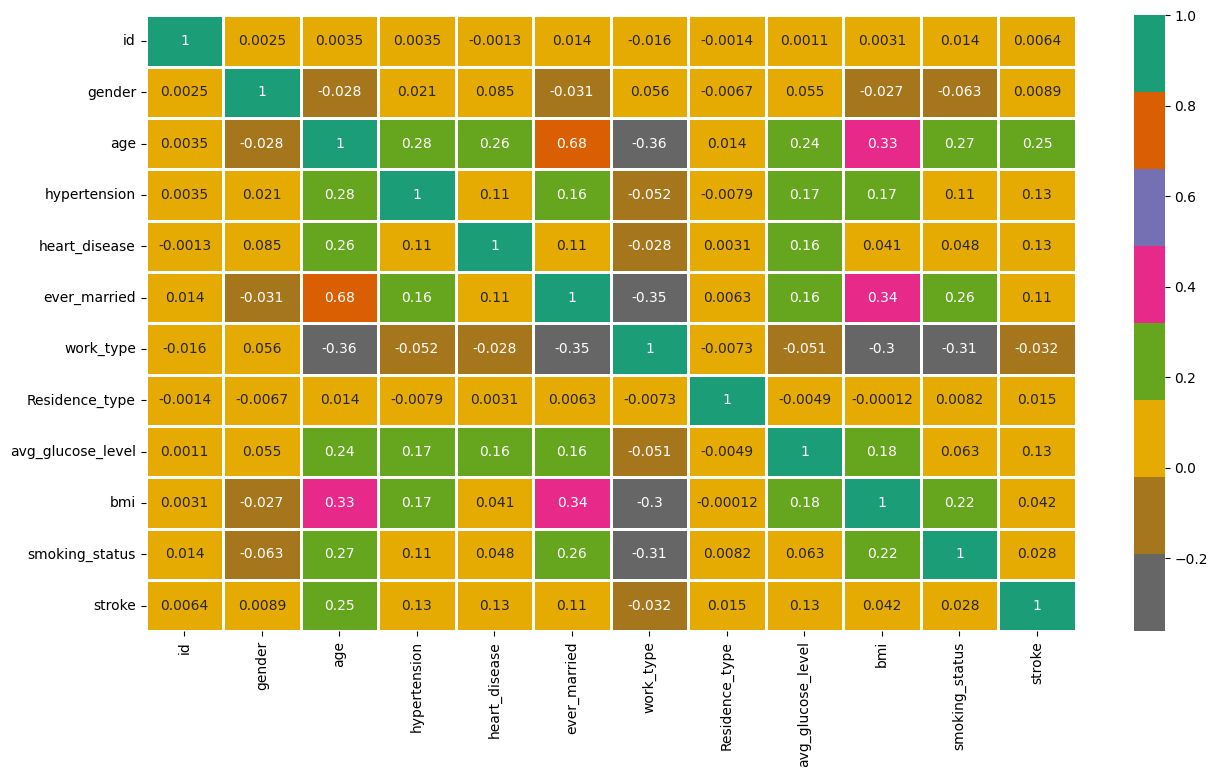

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

#Summarize

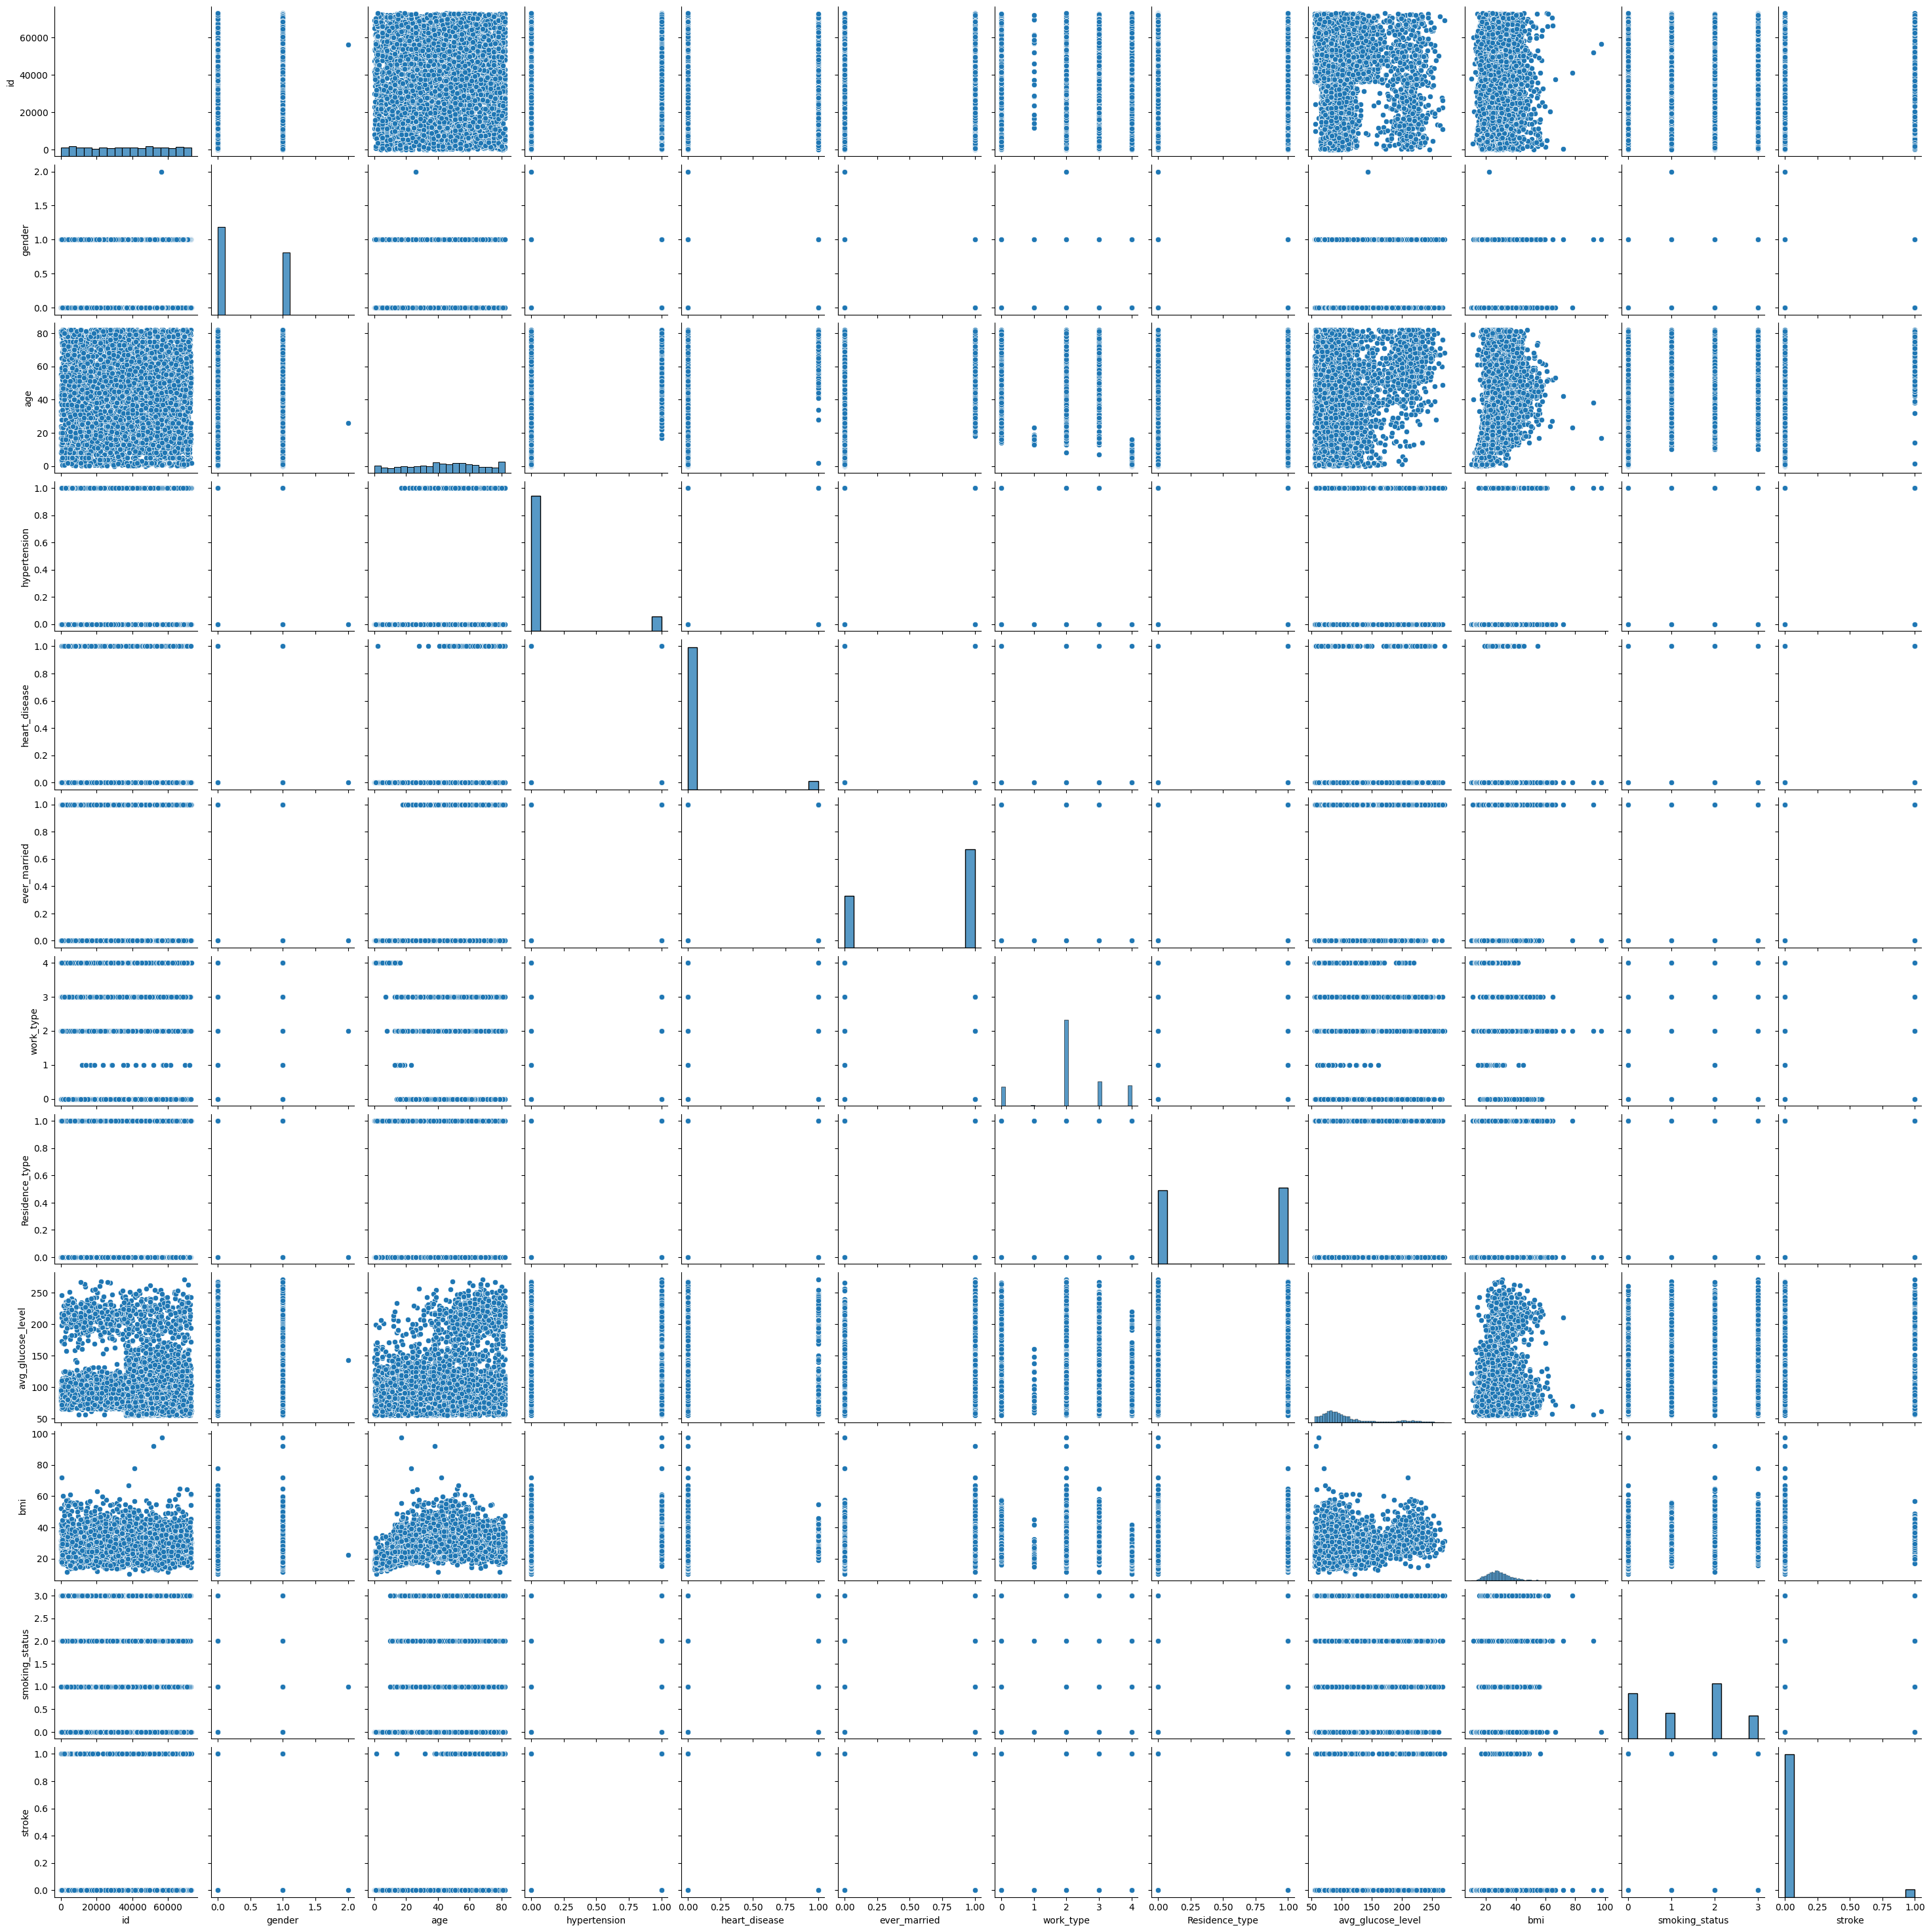

In [45]:
#biểu đồ so sánh mối quan hệ giữa các cặp thuộc tính
sns.pairplot(data = data1,kind ='scatter')

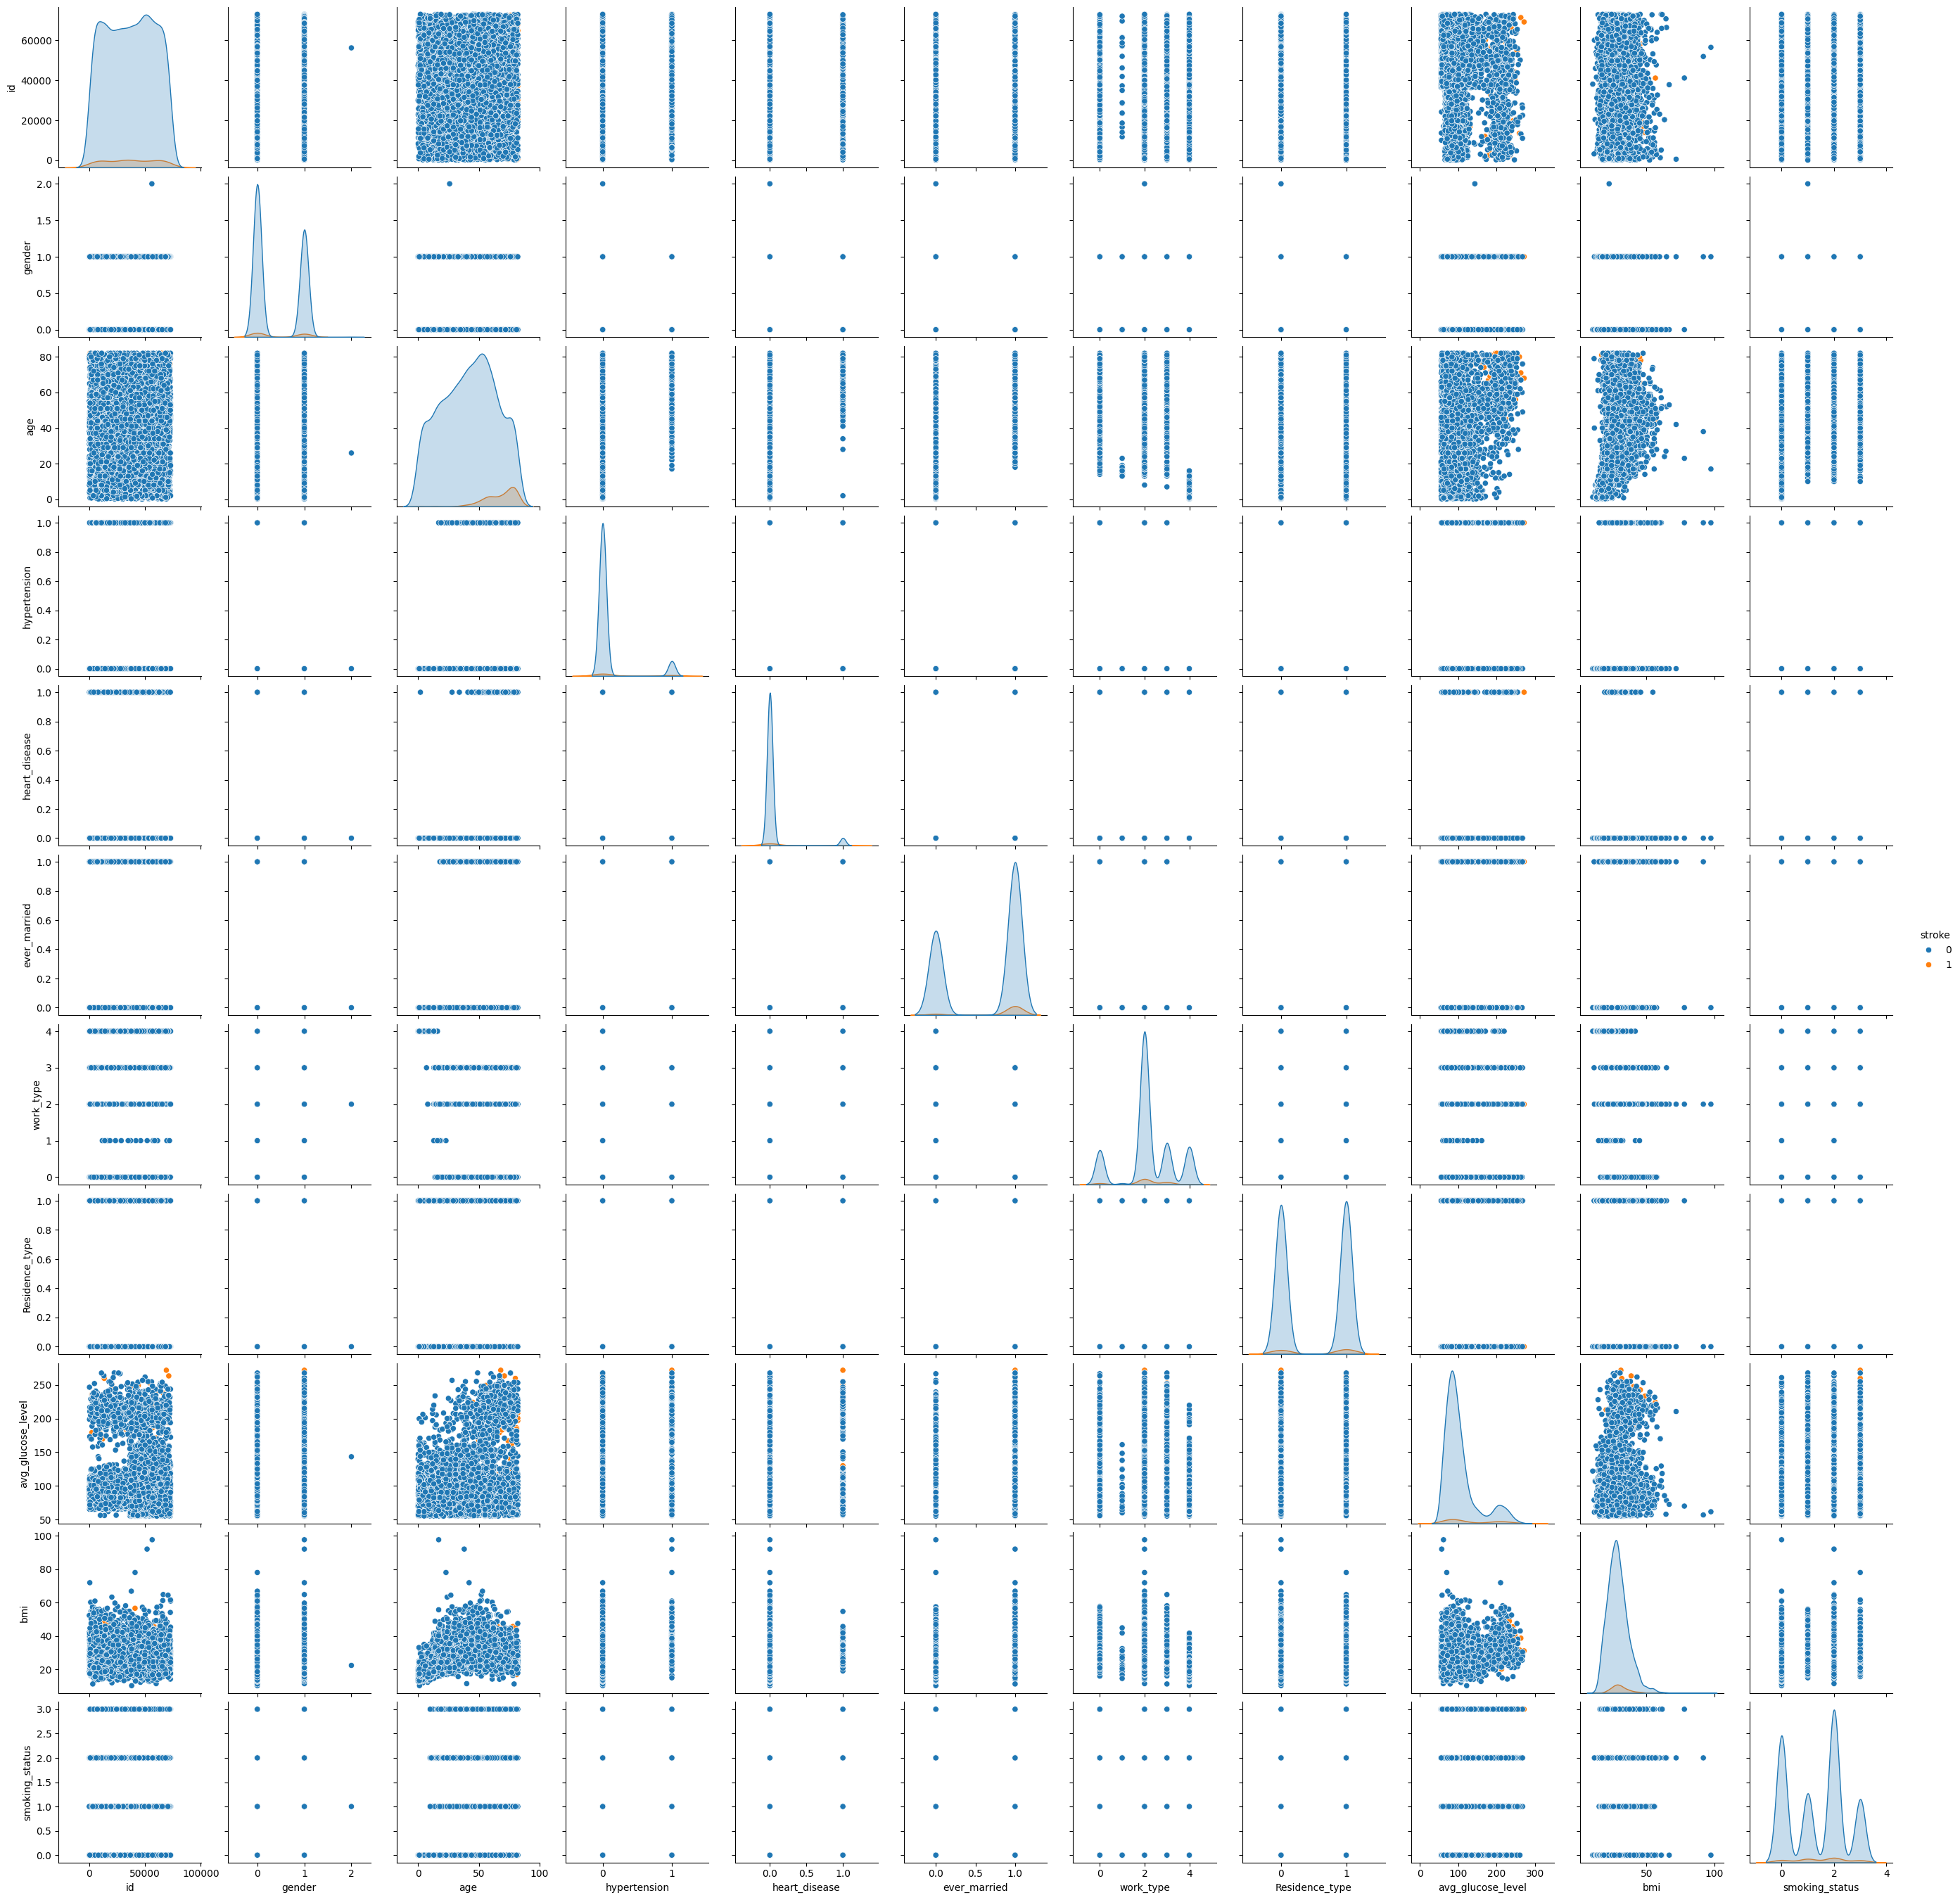

In [46]:
#biểu đồ so sánh quan hệ giữa các cặp thuộc tính phân chia theo stroke hay không
sns.pairplot(data = data1,hue ="stroke");

#Applied Algorithms

In [47]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer,KNNImputer
#model selection
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [49]:
data1.drop(columns="id",inplace=True)

In [50]:
#tăng số lượng data để giảm chênh lệch
#chia data
X= data1.drop('stroke',axis = 1)
y = data1['stroke']
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col = X.columns
X[col] = st.fit_transform(X[col])
X[col]

gender       age  hypertension  heart_disease  ever_married  \
0     1.188073  1.051434     -0.328602       4.185032      0.723884   
1    -0.840344  0.786070     -0.328602      -0.238947      0.723884   
2     1.188073  1.626390     -0.328602       4.185032      0.723884   
3    -0.840344  0.255342     -0.328602      -0.238947      0.723884   
4    -0.840344  1.582163      3.043196      -0.238947      0.723884   
...        ...       ...           ...            ...           ...   
5105 -0.840344  1.626390      3.043196      -0.238947      0.723884   
5106 -0.840344  1.670617     -0.328602      -0.238947      0.723884   
5107 -0.840344 -0.363842     -0.328602      -0.238947      0.723884   
5108  1.188073  0.343796     -0.328602      -0.238947      0.723884   
5109 -0.840344  0.034205     -0.328602      -0.238947      0.723884   

      work_type  Residence_type  avg_glucose_level       bmi  smoking_status  
0     -0.153836        0.984080           2.706375  0.981345       -0.351781  
1      0.763438       -1.016178           2.121559       NaN        0.581552  
2     -0.153836       -1.016178          -0.005028  0.459269        0.581552  
3     -0.153836        0.984080           1.437358  0.701207        1.514885  
4      0.763438       -1.016178           1.501184 -0.623083        0.581552  
...         ...             ...                ...       ...             ...  
5105  -0.153836        0.984080          -0.494658       NaN        0.581552  
5106   0.763438        0.984080           0.420775  1.414286        0.581552  
5107   0.763438       -1.016178          -0.511443  0.217332        0.581552  
5108  -0.153836       -1.016178           1.328257 -0.419346       -0.351781  
5109  -1.988384        0.984080          -0.460867 -0.342945       -1.285114  

[5110 rows x 10 columns]

In [51]:
#chia dữ liệu train và test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [54]:
#điền null bằng mean
imputer = SimpleImputer(strategy ='median') ## quy định trung bình ('mean' cho giá trị trung bình và 'most_frequent' cho quy định chế độ)
imputer.fit(X_train) #tìm hiểu các giá trị trung bình từ dữ liệu
X_train = imputer.transform(X_train) #thay thế các giá trị bị thiếu bằng số trung vị
X_test = imputer.transform(X_test)




#Naive Bayes

In [82]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb = round(accuracy_score(y_test,Y_pred)*100,2)
acc_gaussian = round(gaussian.score(X_train,y_train)*100,2)

cm = confusion_matrix(y_test,Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test,Y_pred,average = 'micro')
recall = recall_score(y_test,Y_pred,average = 'micro')
f1 = f1_score(y_test,Y_pred,average = 'micro')
print('Confusion matrix for Naive Bayes \n')
print('accuracy_Naive bayes : %.3f' %accuracy)
print('precision_Naive bayes : %.3f' %precision)
print("recall_Naive bayes : %.3f" %recall)
print('f1_Naive bayes: %.3f' %f1)


Confusion matrix for Naive Bayes 

accuracy_Naive bayes : 0.882
precision_Naive bayes : 0.882
recall_Naive bayes : 0.882
f1_Naive bayes: 0.882


#Decision Tree

In [63]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_dt = round(accuracy_score(y_test,Y_pred)*100,2)
acc_decision_tree = round(decision_tree.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test,Y_pred,average = 'micro')
recall = recall_score(y_test,Y_pred,average = 'micro')
f1 = f1_score(y_test,Y_pred,average ='micro')
print('Confusion Matrix for DecisionTree \n')
print("Accuracy_DecisionTree %.3f"%accuracy)
print("Precision_DecisionTree %.3f"%precision)
print("recall_DecisionTree %.3f"%recall)
print("r1_DecisionTree %.3f"%f1)


Confusion Matrix for DecisionTree 

Accuracy_DecisionTree 0.918
Precision_DecisionTree 0.918
recall_DecisionTree 0.918
r1_DecisionTree 0.918


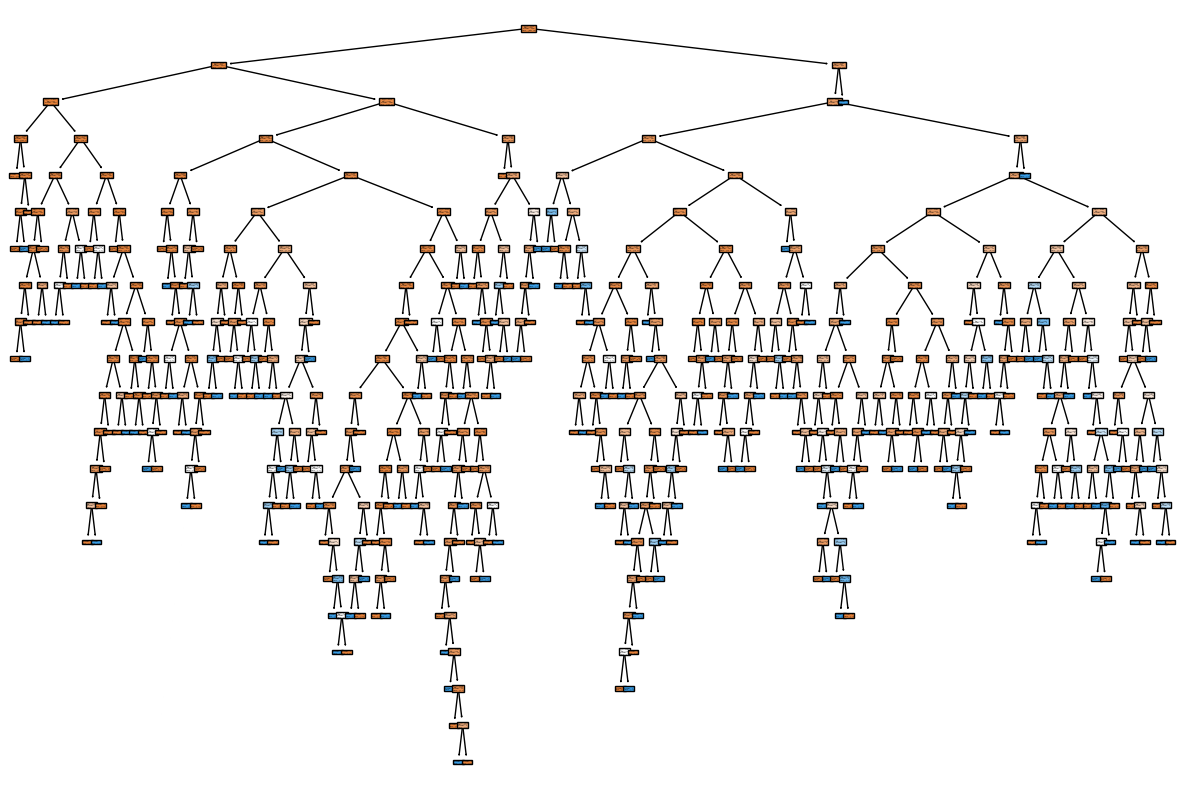

In [65]:
from sklearn.tree import plot_tree
plt.figure(figsize =(15,10))
plot_tree(decision_tree.fit(X_train,y_train),filled = True)
plt.show()

#Random Forest

In [70]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_pred)* 100, 2)

acc_random_forest = round(random_forest.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test,Y_pred,average = 'micro')
recall = recall_score(y_test,Y_pred,average ='micro')
f1 = f1_score(y_test,Y_pred,average ='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)


Confusion matrix for Random Forest
 [[968   0]
 [ 53   1]]
accuracy_random_Forest : 0.948
precision_random_Forest : 0.948
recall_random_Forest : 0.948
f1-score_random_Forest : 0.948


In [71]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[963   5]
 [ 53   1]]
accuracy_KNN : 0.943
precision_KNN : 0.943
recall_KNN: 0.943
f1-score_KNN : 0.943


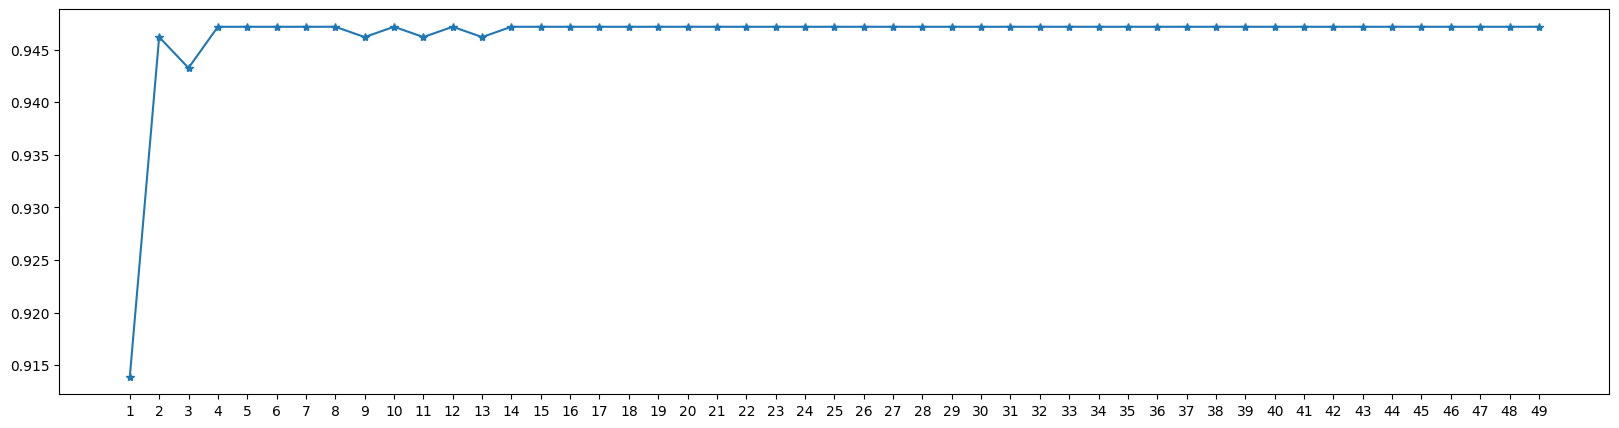

In [77]:
# Với nhiều giá trị của n
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    prediction=model.predict(X_test)
    a=a._append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

#MLP

In [78]:
MLP = MLPClassifier(hidden_layer_sizes=150, random_state=3, max_iter=200)
MLP.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_MLP=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_MLP = round(MLP.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Multi Layer Perceptron\n',cm)
print('accuracy_Multi Layer Perceptron: %.3f' %accuracy)
print('precision_Multi Layer Perceptron: %.3f' %precision)
print('recall_Multi Layer Perceptron: %.3f' %recall)
print('f1-score_Multi Layer Perceptron : %.3f' %f1)

Confusion matrix for Multi Layer Perceptron
 [[878  90]
 [ 31  23]]
accuracy_Multi Layer Perceptron: 0.882
precision_Multi Layer Perceptron: 0.882
recall_Multi Layer Perceptron: 0.882
f1-score_Multi Layer Perceptron : 0.882


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#SVM

In [79]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[968   0]
 [ 54   0]]
accuracy_SVC: 0.947
precision_SVC: 0.947
recall_SVC: 0.947
f1-score_SVC : 0.947


## Find Best Model

In [85]:
results = pd.DataFrame({
    'Model': [ 'KNN',
              'Random Forest',
              'Naive Bayes',
              ' Support Vector Machine',
              'Multi Layer Perceptron',
              'Decision Tree'],
    'Score': [ acc_knn,
              acc_random_forest,
              acc_gaussian,
              acc_linear_svc,
              acc_MLP,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_MLP,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

Model   Score  Accuracy_score
0            Random Forest  100.00           94.81
1   Support Vector Machine   95.23           94.72
2                      KNN   95.79           94.32
3            Decision Tree  100.00           91.78
4              Naive Bayes   87.11           88.16
5   Multi Layer Perceptron   95.55           88.16

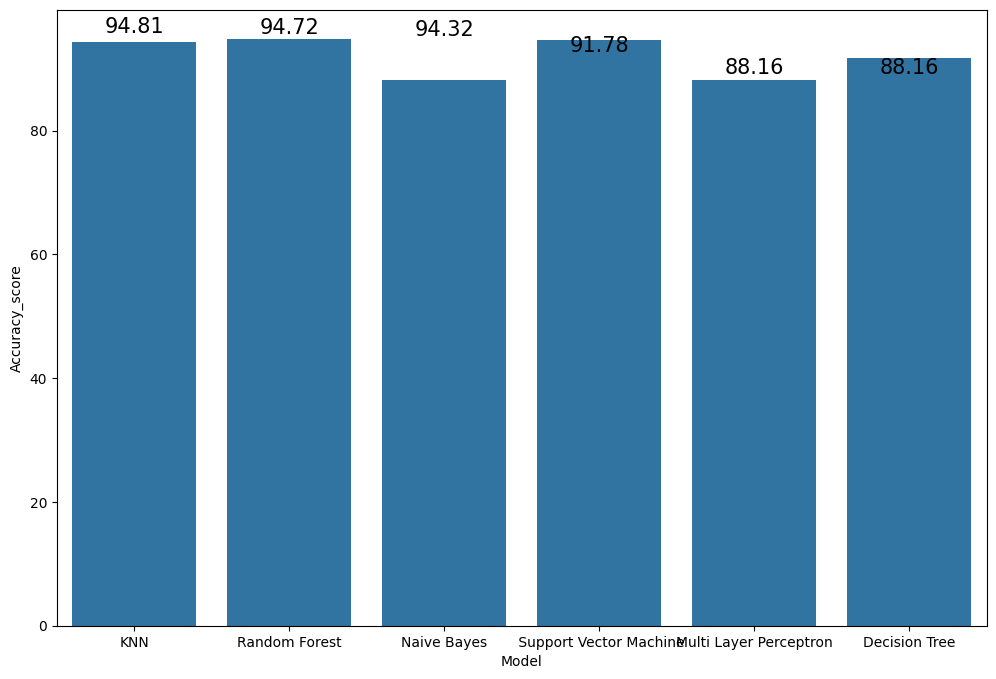

In [89]:
plt.subplots(figsize = (12,8))
ax = sns.barplot(x = 'Model',y = "Accuracy_score",data= results)
labels =(result_df['Accuracy_score'])
# thêm số kết quả vào biểu đồ
for i ,j in enumerate(labels):
    ax.text(i,j+1,str(j),horizontalalignment ='center',size = 15,color = "black")